In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
listings = pd.read_csv('../data/listings_clean.csv')

In [3]:
# converting data type to datetime.
listings[['host_since', 'calendar_last_scraped','first_review','last_review']] = listings[['host_since', 'calendar_last_scraped','first_review','last_review']].apply(pd.to_datetime)

In [4]:
# changing data type of is,host_id columns to object
listings[['id','host_id']] = listings[['id','host_id']].astype('object')

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            6883 non-null   object        
 1   host_id                                       6883 non-null   object        
 2   host_since                                    6868 non-null   datetime64[ns]
 3   host_response_time                            5021 non-null   object        
 4   host_response_rate                            5021 non-null   float64       
 5   host_acceptance_rate                          5517 non-null   float64       
 6   host_is_superhost                             6868 non-null   float64       
 7   host_listings_count                           6868 non-null   float64       
 8   host_total_listings_count                     6868 non-null   float6

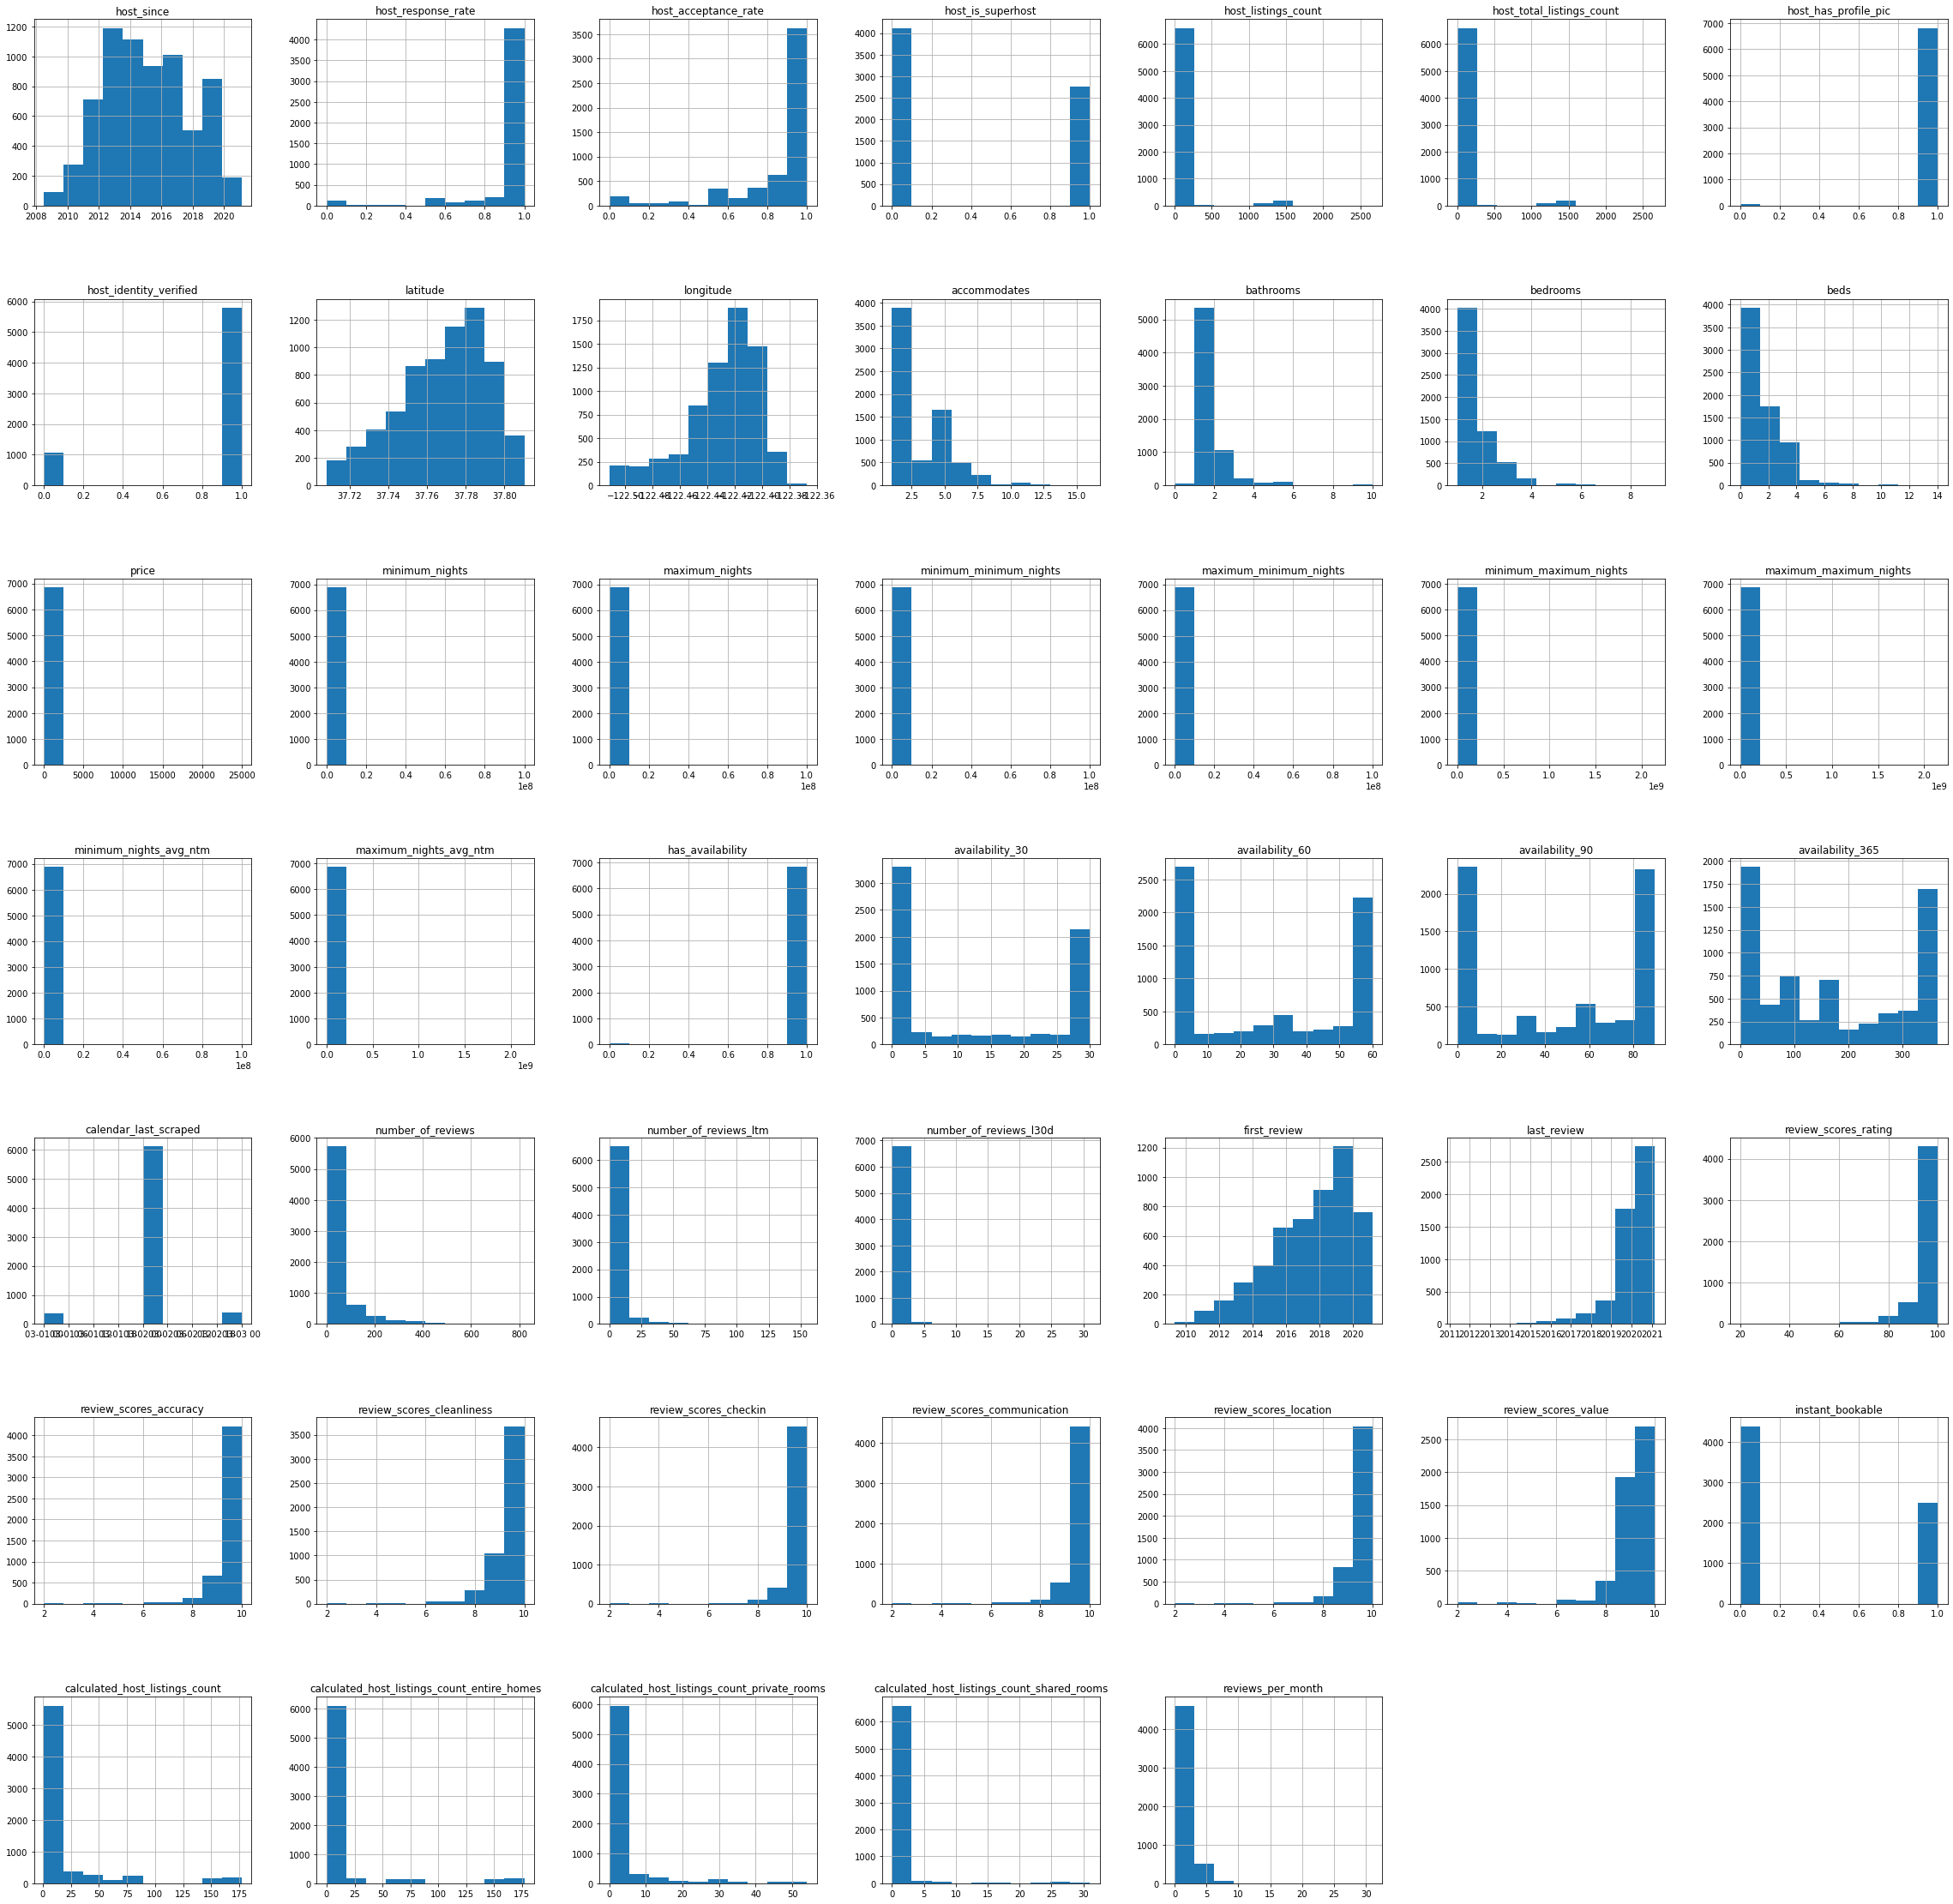

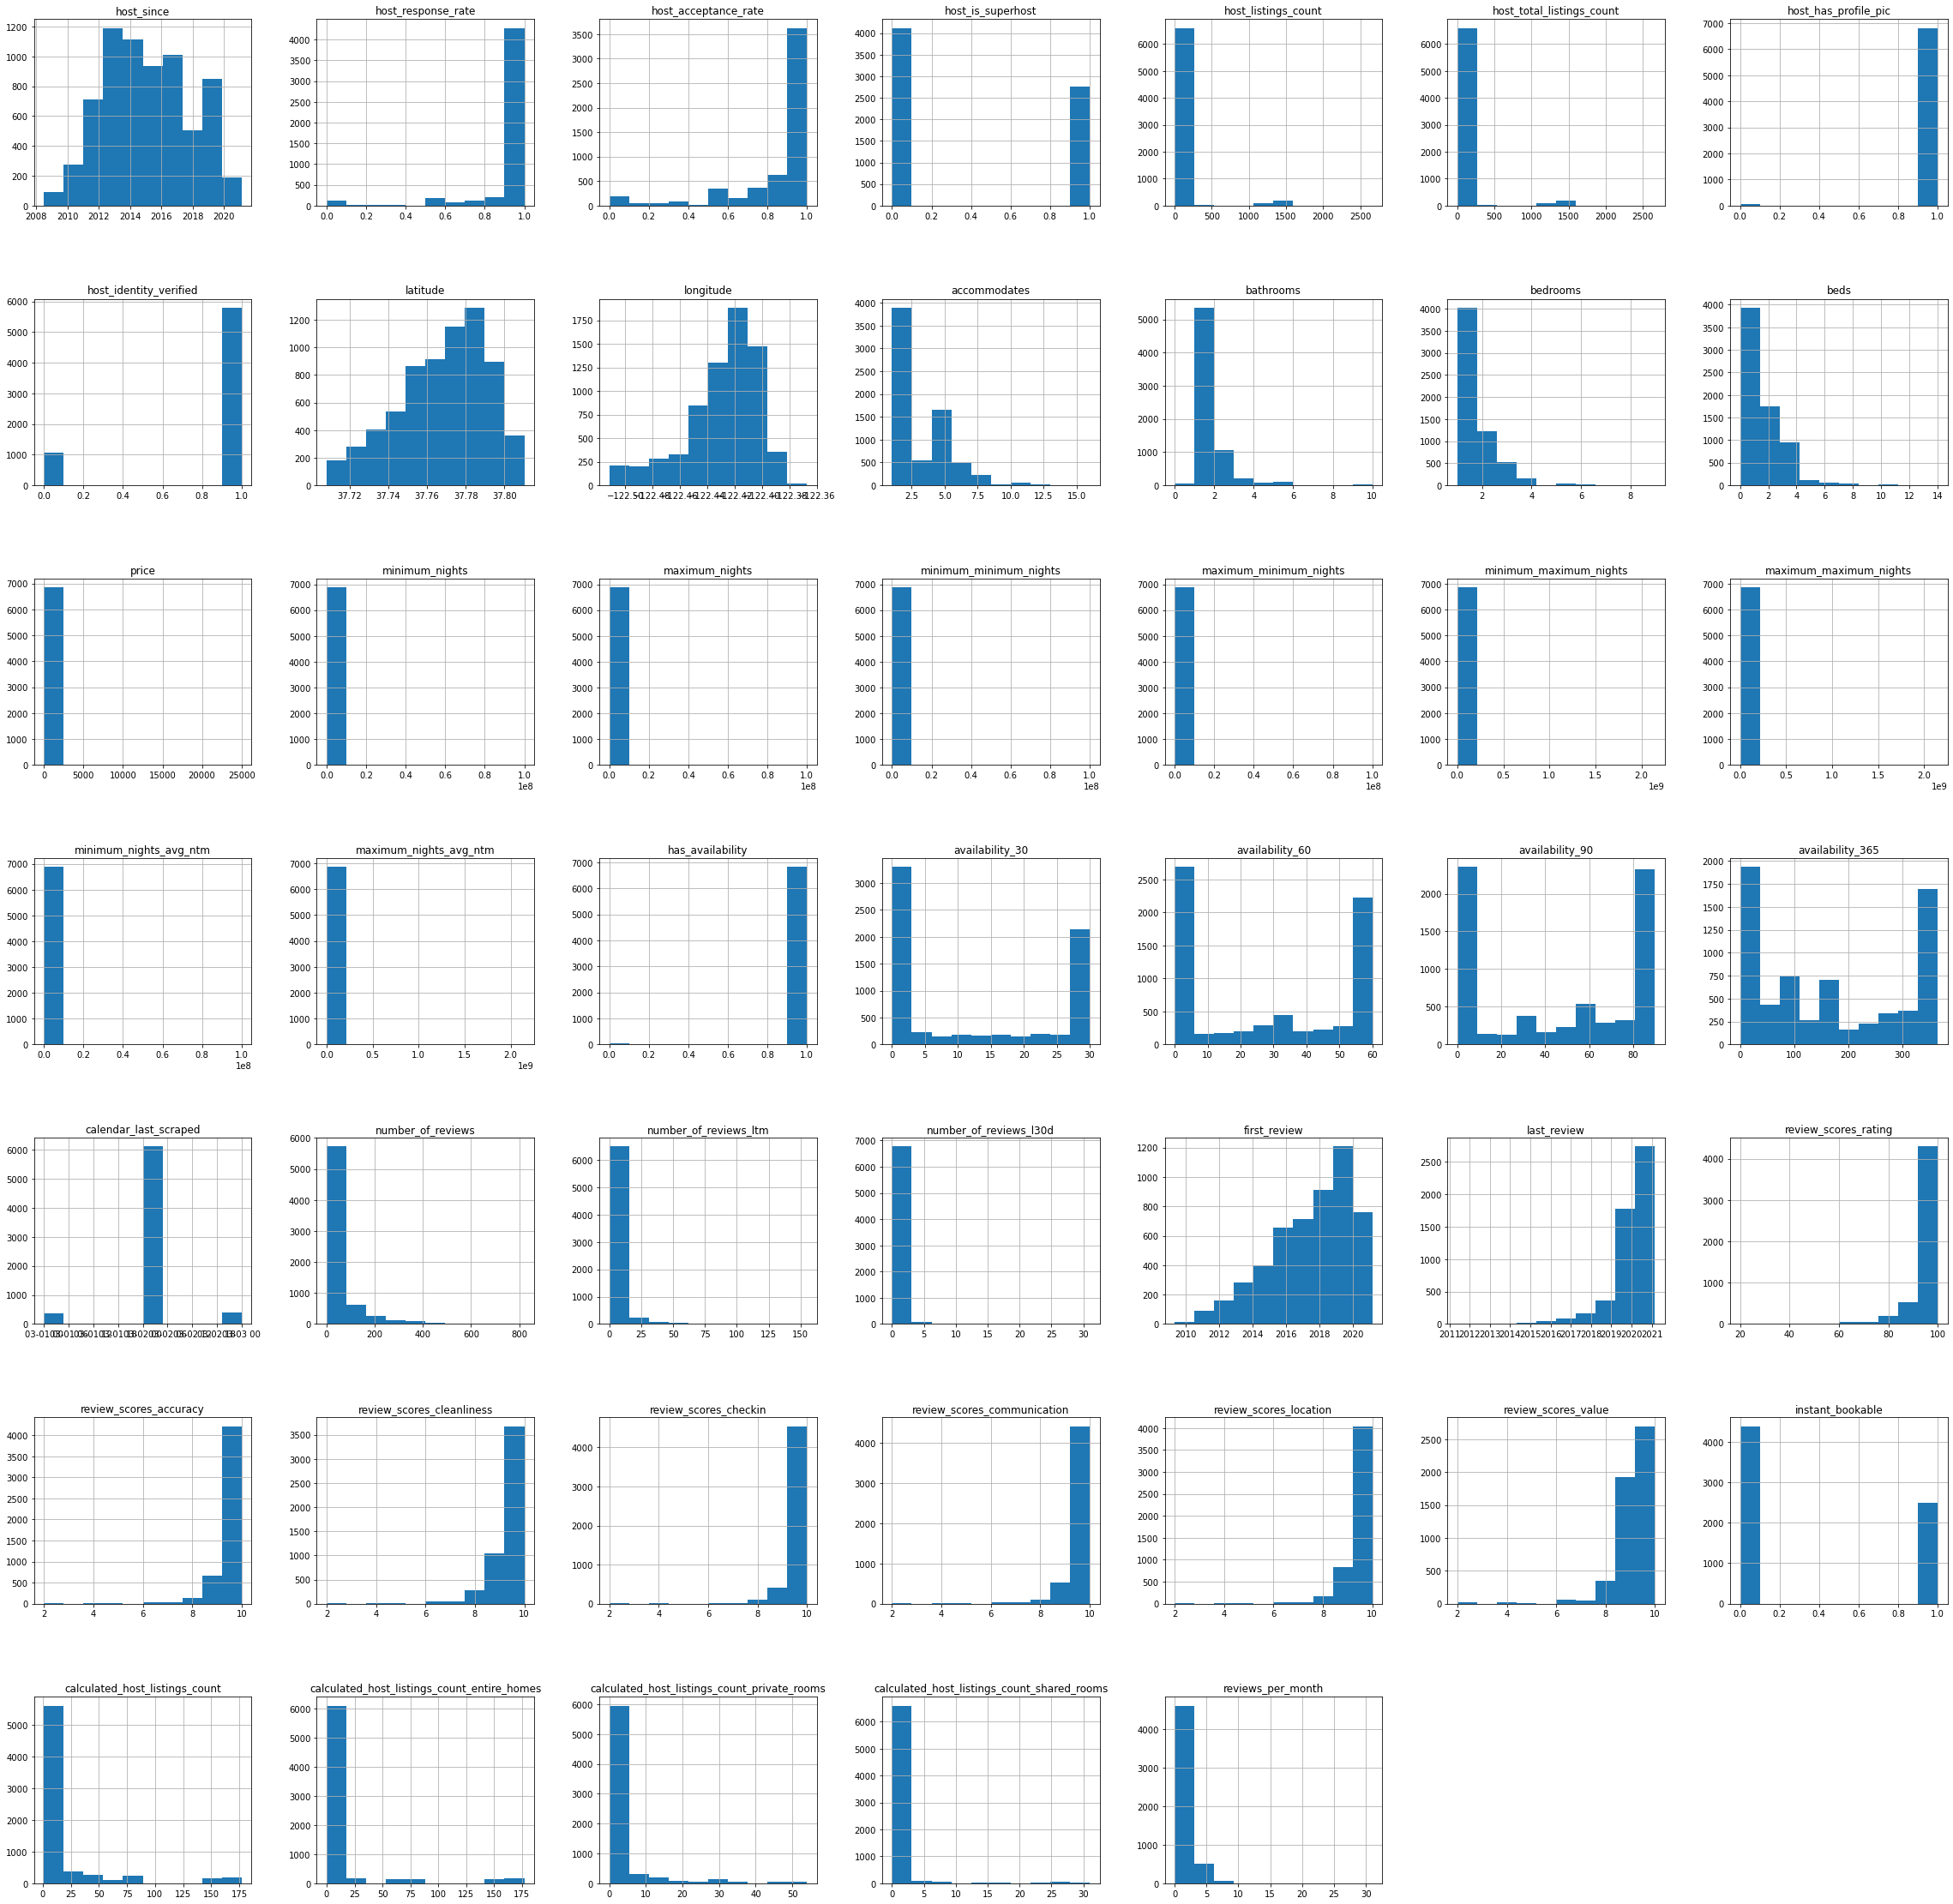

In [6]:
# plotting the distribution of the variables in the listings data frame.

listings.hist(figsize=(40,40))
plt.subplots_adjust(hspace=0.5);

* Histograms reveal that small portion of hosts own large number of listings and majority own single listing. 
* host_listings_count and host_total_listings_count has a very similar distribution, I will check if they have same values or if they are highly correlated. If so I will drop one of the variables.
* Looks like we have a similar situation for the calculted_host_listings_count and calculted_host_listings_count .

In [7]:
# Creating a features dataframe by selecting columns which has data type float64 and int64.

features = listings.select_dtypes(include=['float64','int64'])
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            5021 non-null   float64
 1   host_acceptance_rate                          5517 non-null   float64
 2   host_is_superhost                             6868 non-null   float64
 3   host_listings_count                           6868 non-null   float64
 4   host_total_listings_count                     6868 non-null   float64
 5   host_has_profile_pic                          6868 non-null   float64
 6   host_identity_verified                        6868 non-null   float64
 7   latitude                                      6883 non-null   float64
 8   longitude                                     6883 non-null   float64
 9   accommodates                                  6883 non-null   i

* I would assume that number of beds, number of bedrooms and number of people a listing can accomodate would have an association with the price column.

In [8]:

# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x =col, y = 'price', alpha=0.5,data=features)
        ax.set(xlabel=col, ylabel='price')
    nsubplots = nrow * ncol   
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

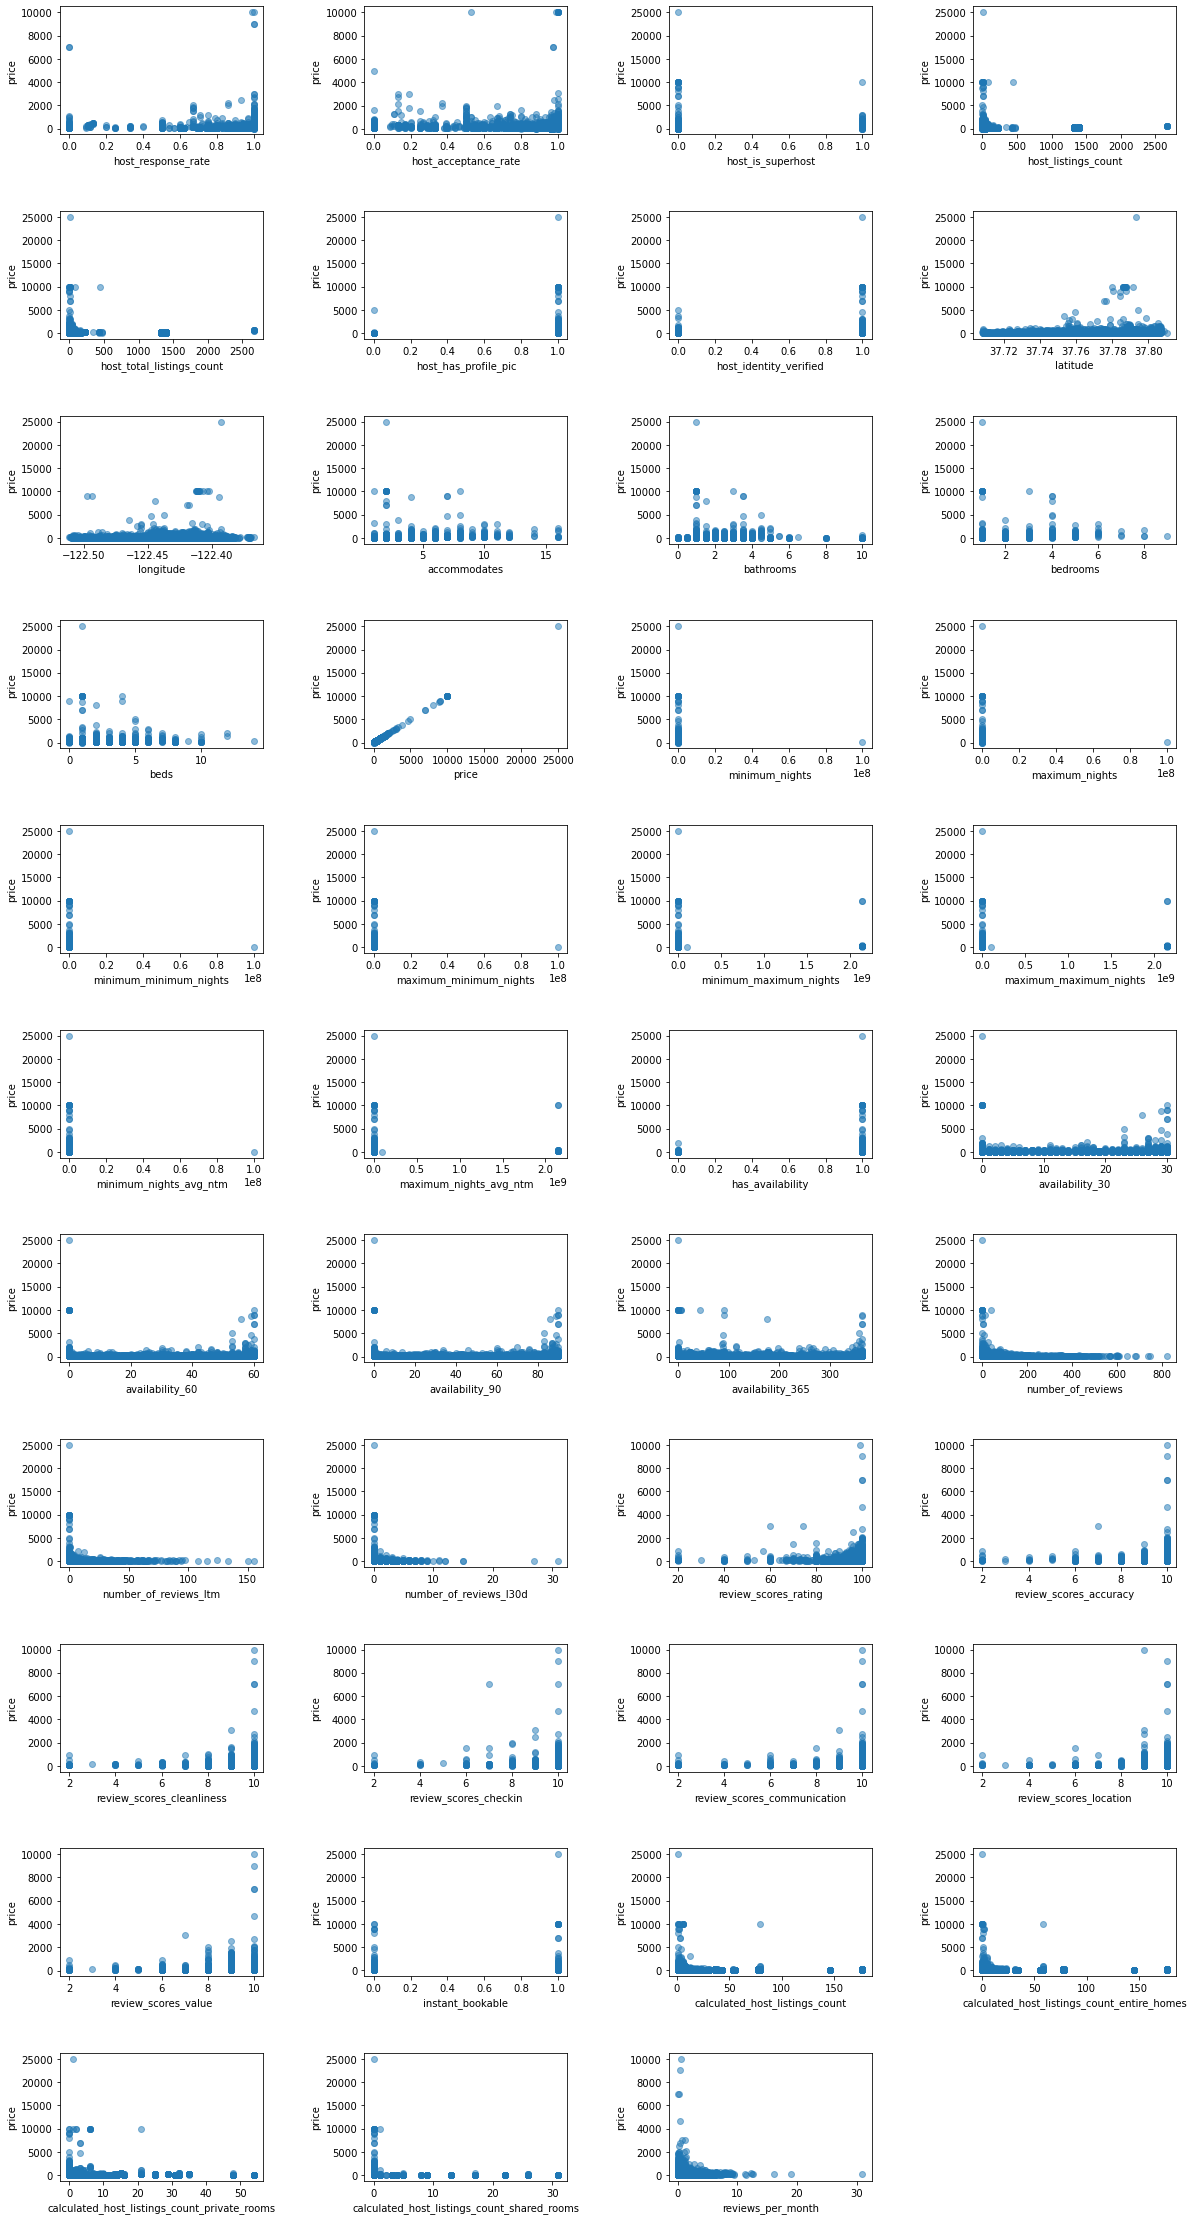

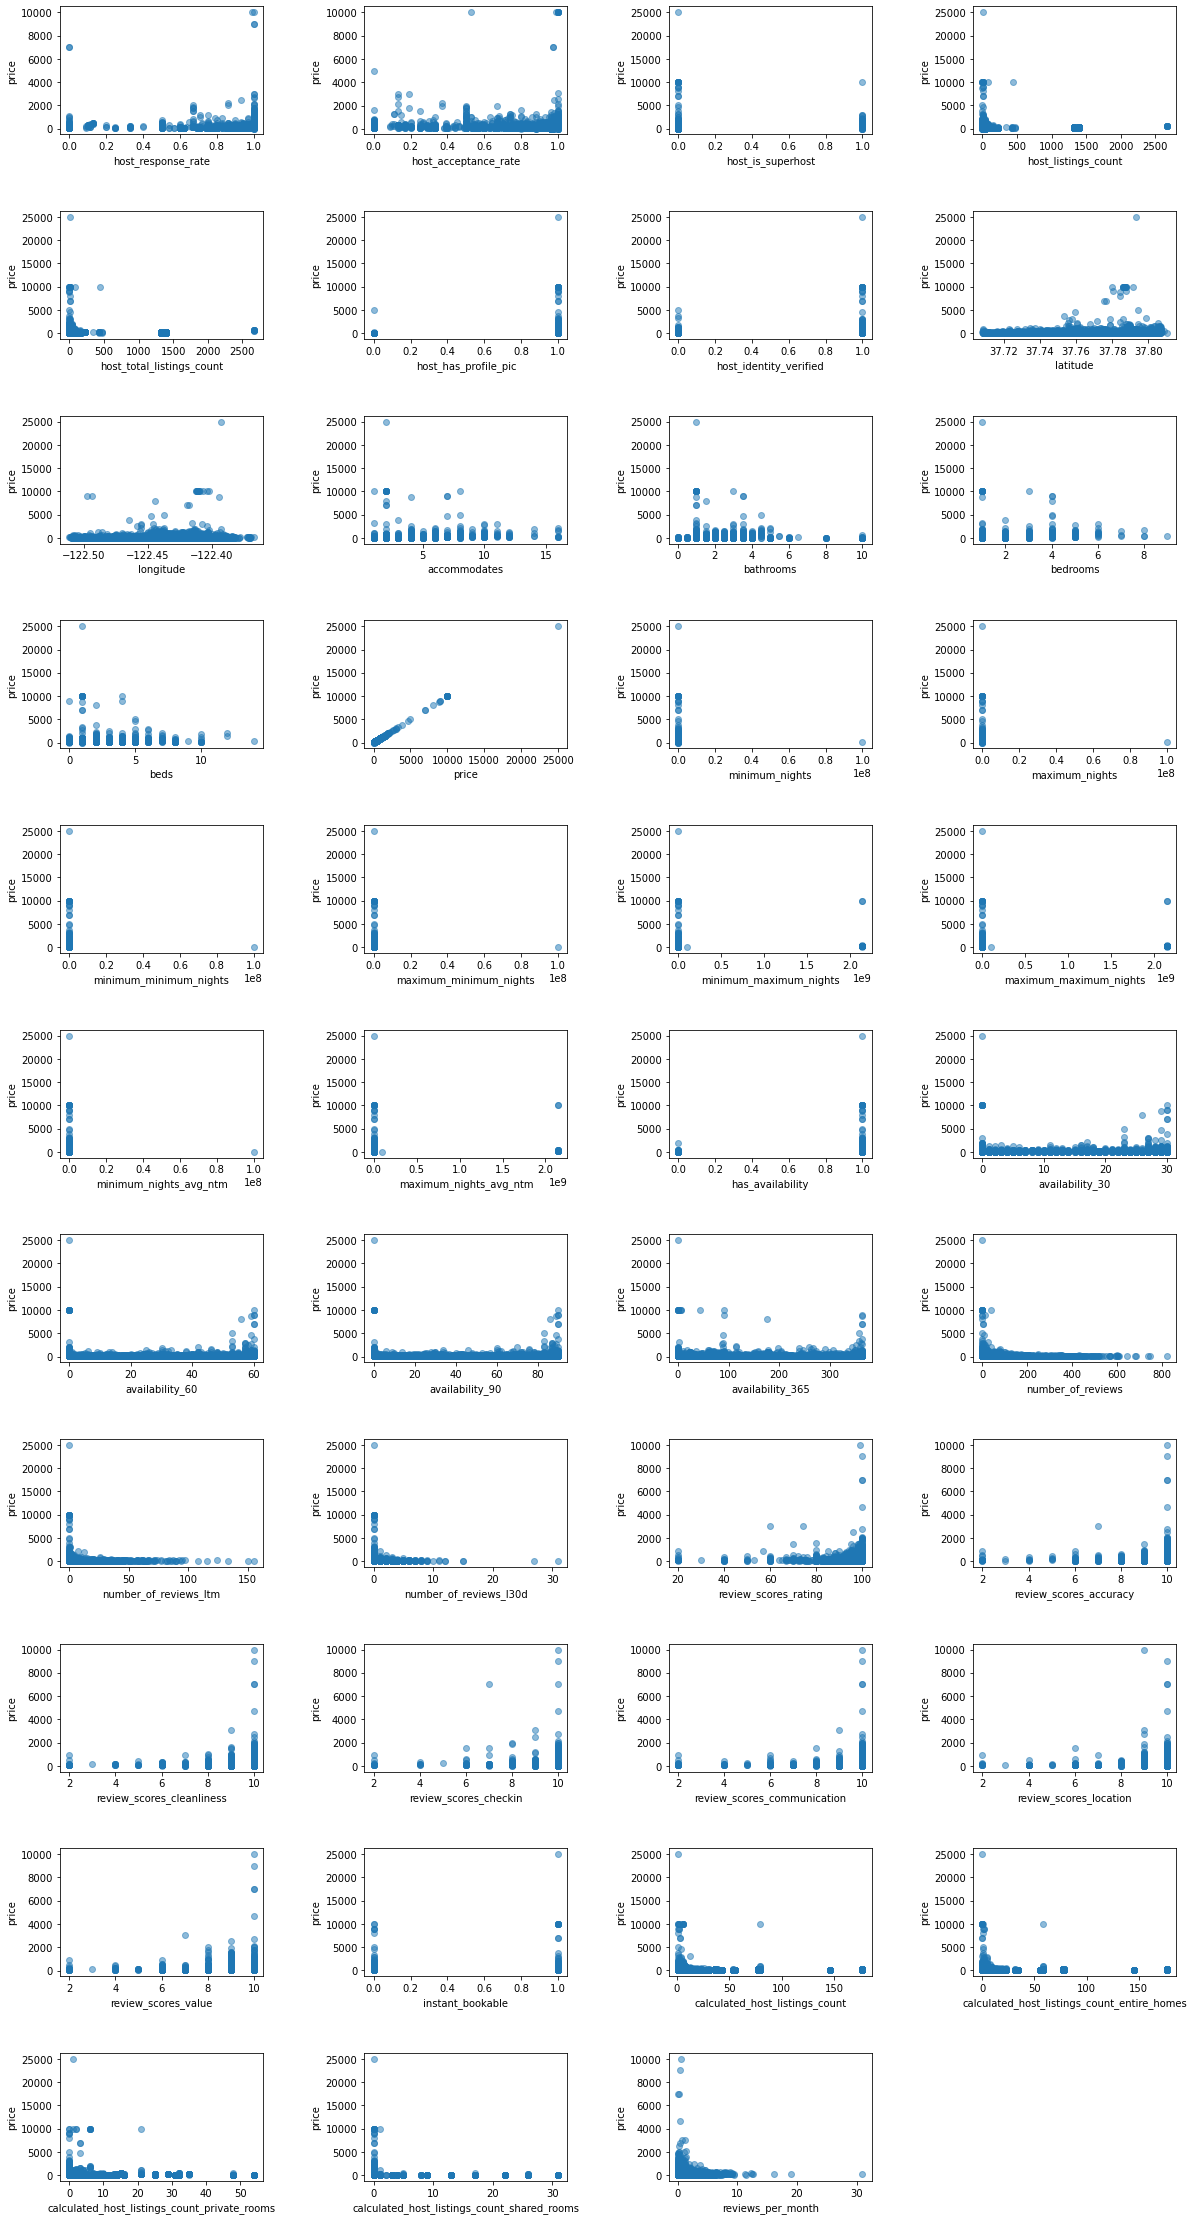

In [9]:
scatterplots(features.columns, ncol=4,figsize=(20,40))

* Since these variables are not continous values and they are mostly discrete it is not possible to see an association using the scatter plot. I will repeat the visualization with the boxplot.

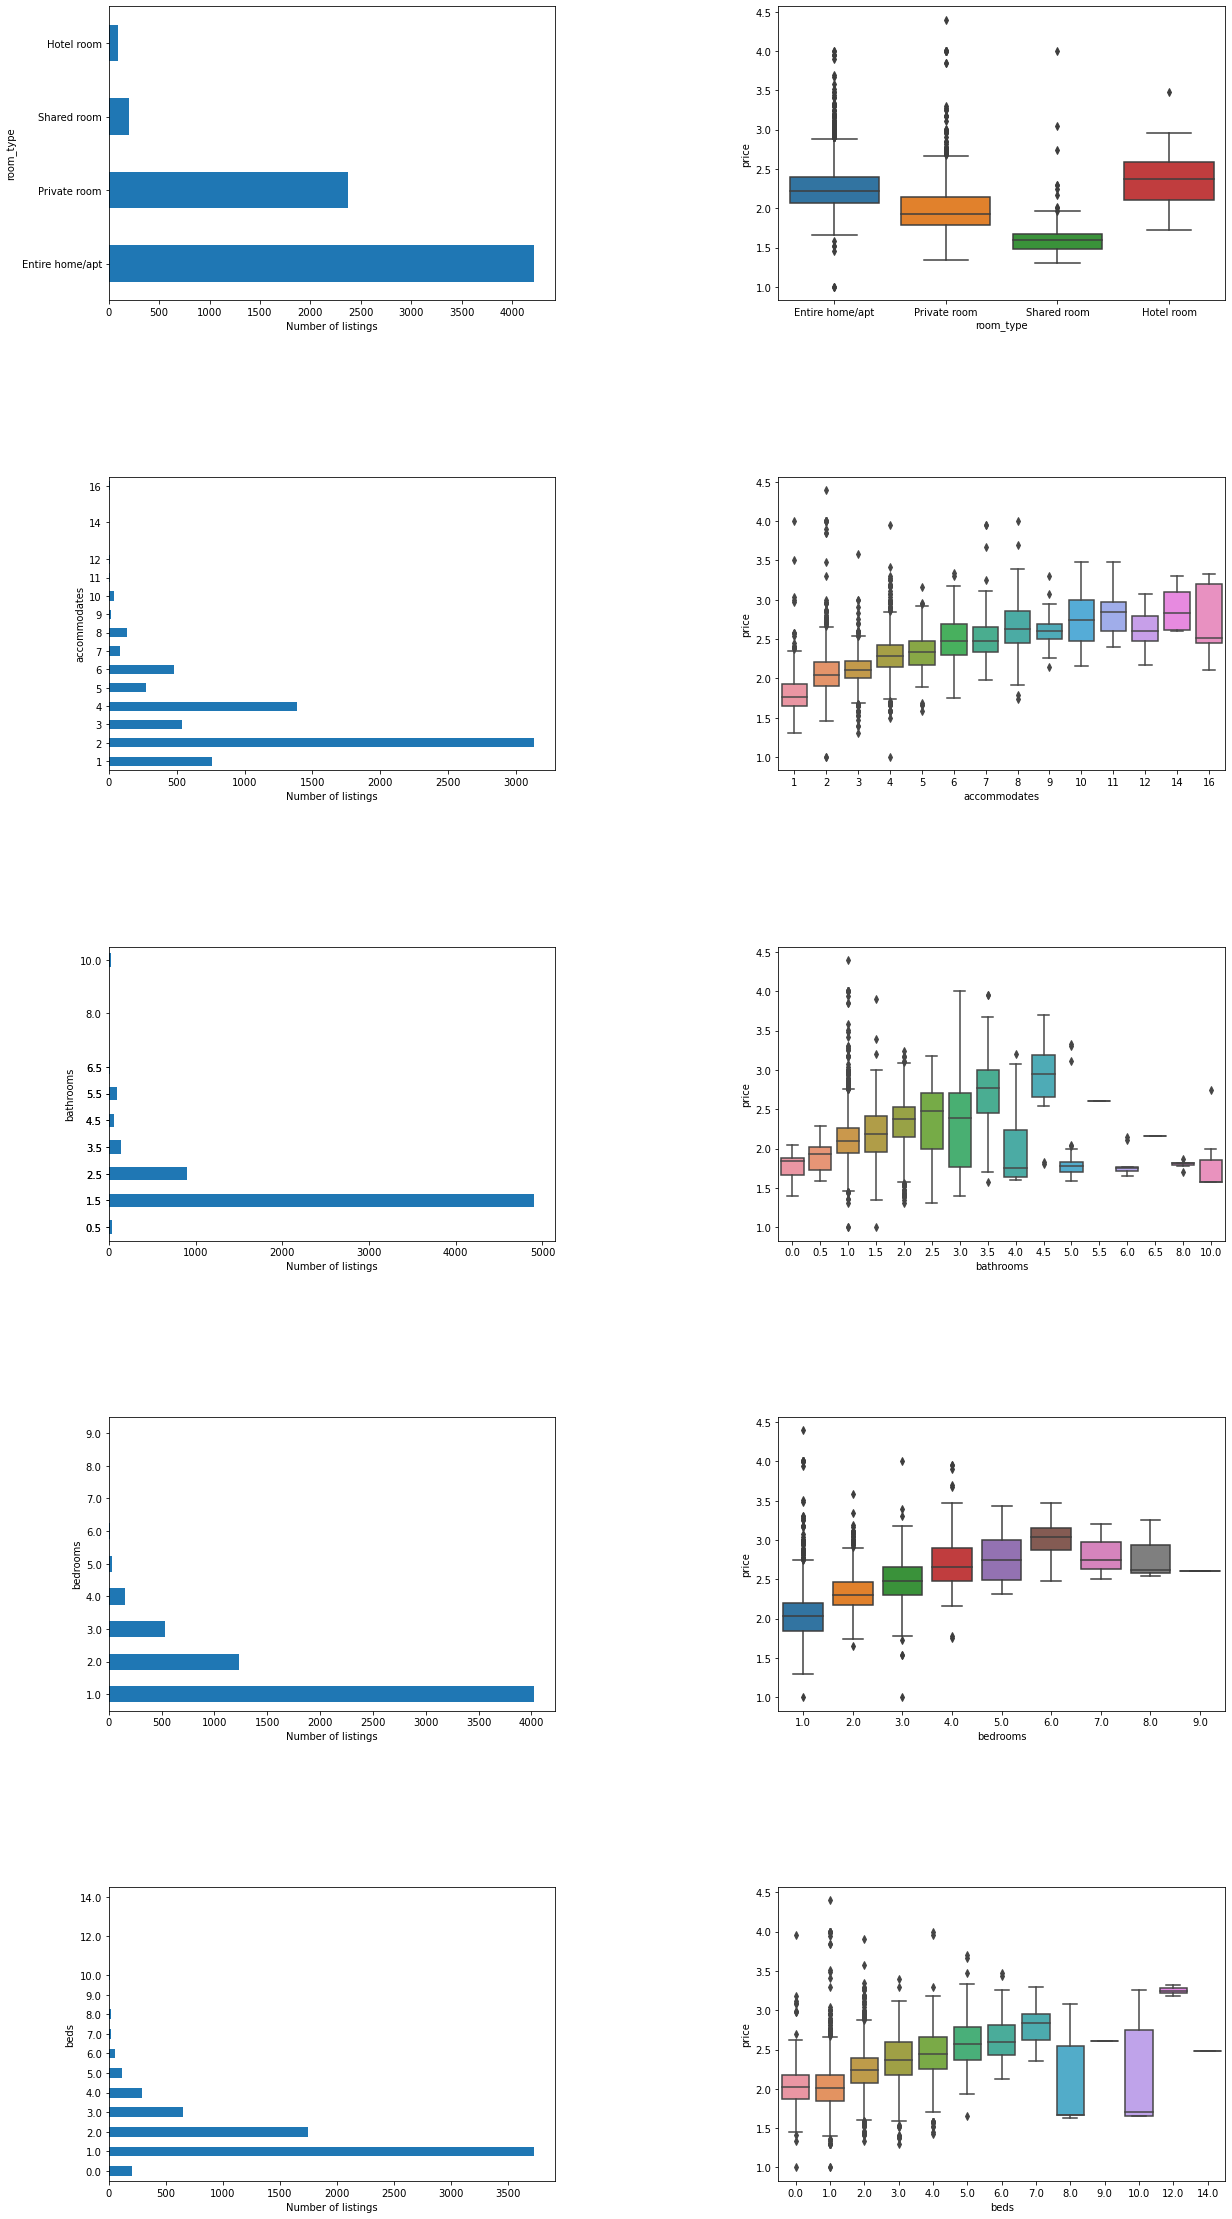

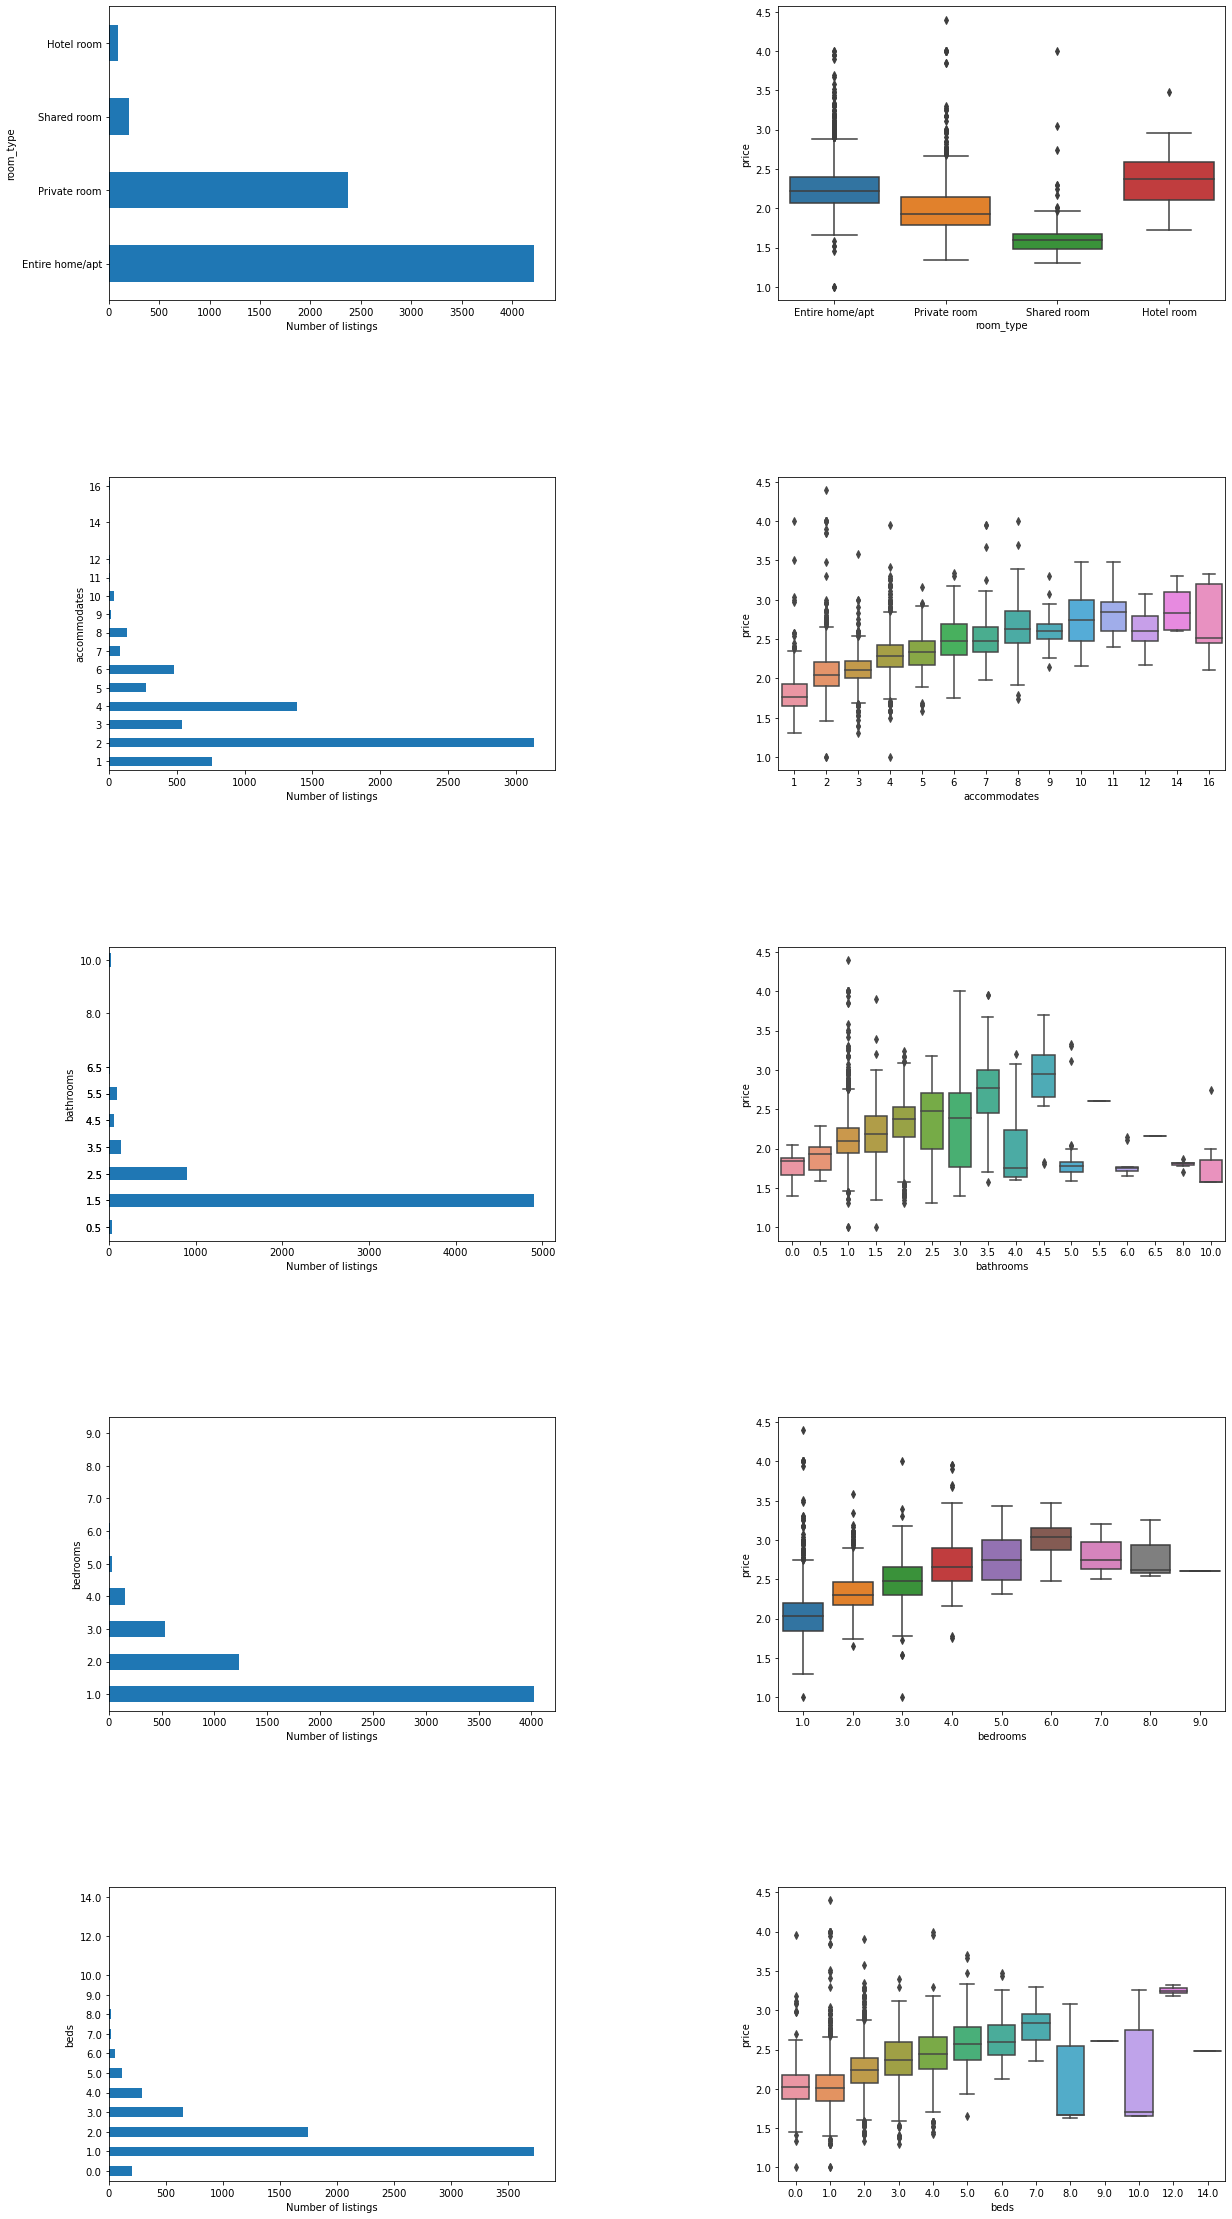

In [10]:
# assigning column names of interest into cols list.
cols = ['room_type','accommodates','bathrooms','bedrooms','beds']

# plotting barplot to visualize number of subgroups in each column i.e. room_types and price 
# plotting boxplot to visualize subgroups in each column vs the price.

nrow=len(cols)
fig, axs = plt.subplots(nrow,2,figsize=(20,40))
fig.subplots_adjust(wspace=0.5, hspace=0.6)
for i in range(nrow):
    plt.subplot(nrow,2,2*i+1)
    listings[cols[i]].value_counts().plot(kind='barh')
    plt.ylabel(cols[i])
    plt.xlabel('Number of listings')
    plt.subplot(nrow,2,2*i+2)
    sns.boxplot(x=cols[i], y=np.log10(listings.price), data=listings)
    plt.ylabel('price')
    plt.xlabel(cols[i])

* Majority of listings are Entire home or apartments. The price distribution of each listing type reveals that hotel rooms tend to be most expensive followed by entire home/apartments. Least expensive listings are shared rooms.

* There is a possitive trend between price of the listings and number of bedrooms, number of beds and number of people a listing can accomodate.